## 1. Import Libraries

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Path to the train.csv file on your Google Drive
file_path = r"C:\Users\vedan\Desktop\flight_price_pred\data\train.csv"

# Read the train.csv file into a Pandas DataFrame
train = pd.read_csv(file_path)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

In [4]:
!pip install wordcloud

## 2. Read the Training Data

In [6]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


### 2.1 Fixing Data Types

In [8]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [9]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [10]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-06-23 08:55:00,2024-06-23 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-23 17:30:00,2024-06-23 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-06-23 11:40:00,2024-06-23 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-06-23 09:25:00,2024-06-23 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-06-23 22:55:00,2024-06-23 07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-23 10:45:00,2024-06-23 18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-06-23 09:25:00,2024-06-23 18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-06-23 14:00:00,2024-06-23 19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-06-23 07:55:00,2024-06-23 13:25:00,330,1.0,No Info,6152


## 3. High-level Summary of Data

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [13]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [14]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


## 4. High-level analysis of Missing Values

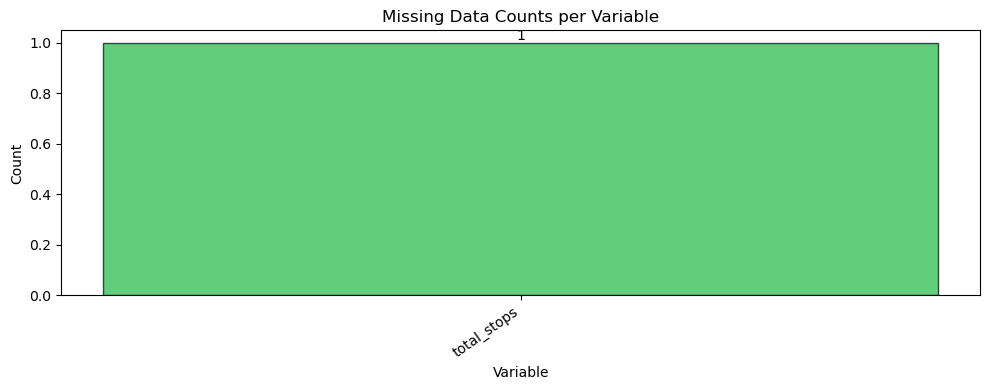

In [16]:
eda_helper_functions.plot_missing_info(train)

In [17]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


In [18]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [19]:
train=train.dropna()
train.shape


(6694, 10)

## 5. High-level analysis of Outliers

In [21]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [22]:
outlier1=(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
)
outlier1

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-06-23 18:55:00,2024-06-23 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-06-23 05:45:00,2024-06-23 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-23 23:05:00,2024-06-23 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-06-23 14:05:00,2024-06-23 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-06-23 21:25:00,2024-06-23 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-06-23 05:50:00,2024-06-23 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-06-23 21:25:00,2024-06-23 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-06-23 09:10:00,2024-06-23 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-23 10:45:00,2024-06-23 18:50:00,1925,2.0,No Info,11093,-1


In [23]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	.duration
	.describe()
)

count    2824.000000
mean      871.683782
std       638.864664
min        75.000000
25%       150.000000
50%      1025.000000
75%      1425.000000
max      2860.000000
Name: duration, dtype: float64

## 6. Pair Plots

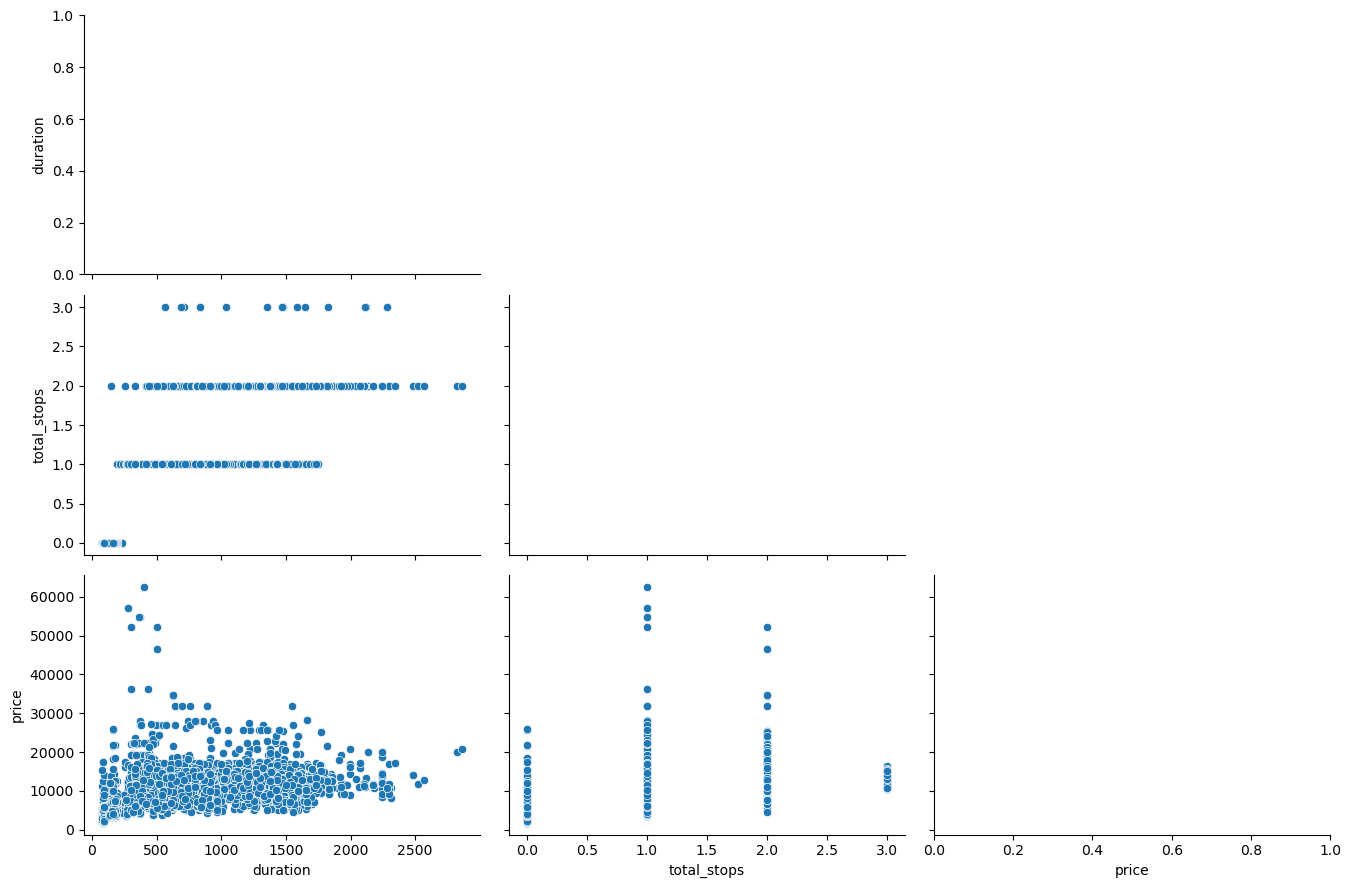

In [25]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

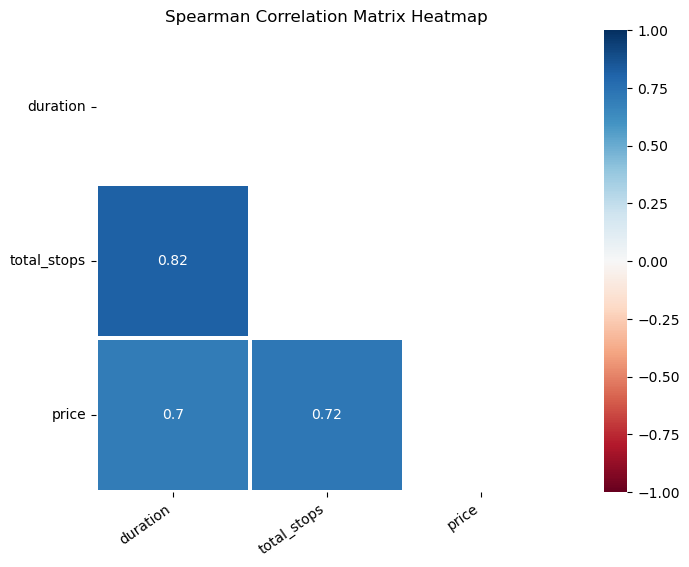

In [27]:
eda_helper_functions.correlation_heatmap(train)

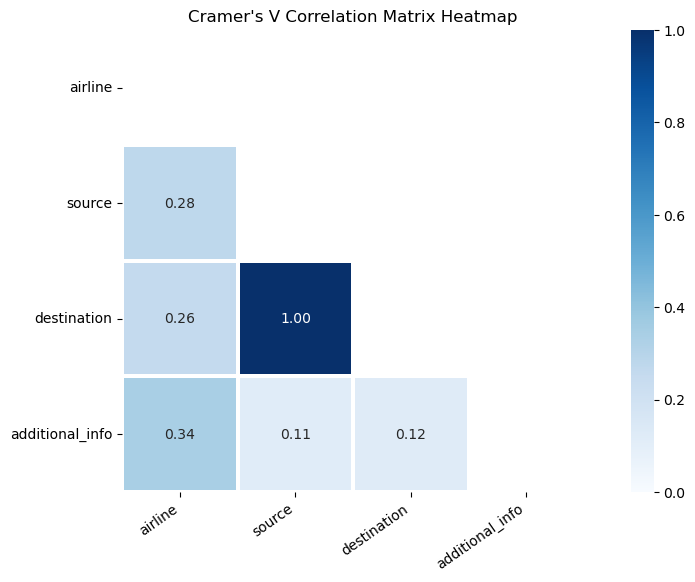

In [28]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [30]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [32]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

In [33]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


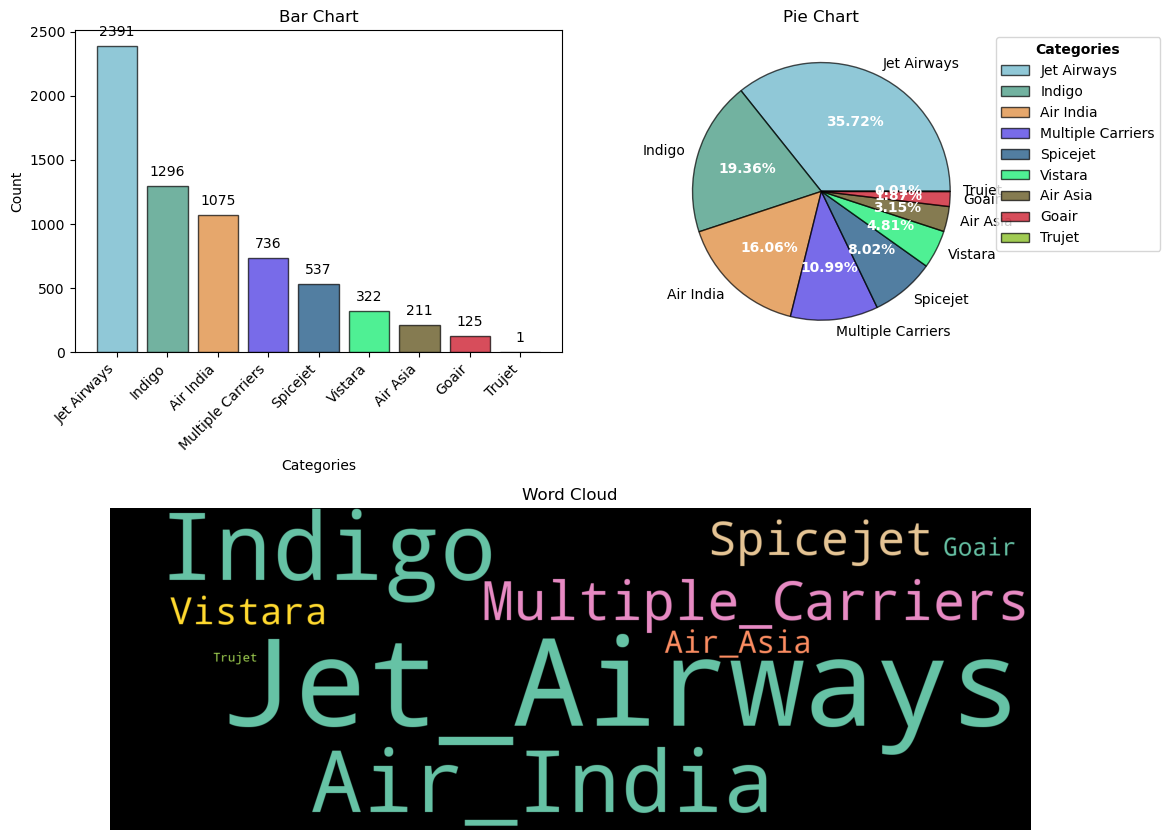

In [34]:
eda_helper_functions.cat_univar_plots(train, "airline")

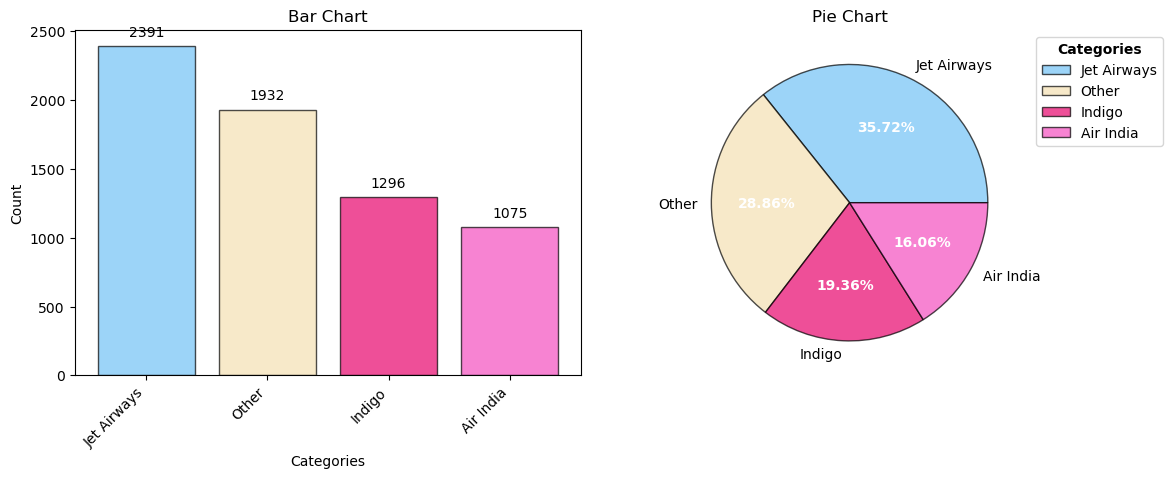

In [35]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

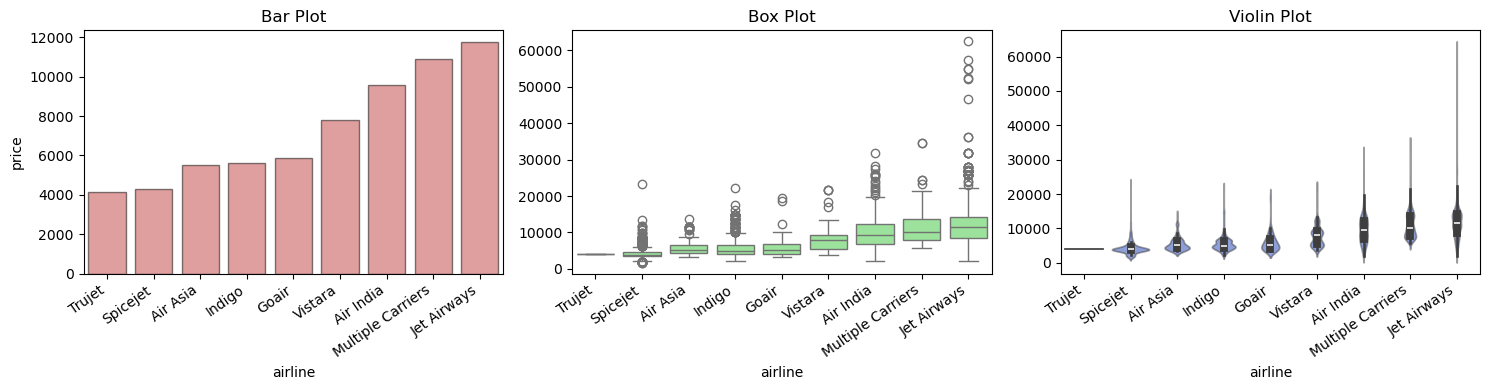

' Feature discretization for multinormality in machine learning refers to\nthe process of converting continuous features that follow a multinormal distribution into discrete categories or intervals.\n\nDiscretization Methods for Multinormal Features:\n\nHere are some common discretization techniques that are suitable for multinormal features:\n\nEqual-Frequency Binning: Divides the data into intervals such that each interval contains approximately \nthe same number of data points. This method works well when the multinormal distribution is relatively balanced.\n\nEqual-Width Binning: Divides the data into intervals of equal width. \nThis method is simple but might not be ideal if the multinormal distribution has varying densities across its range.\n\nK-means Clustering: Uses clustering to identify natural groupings in the data and assigns each data point to a cluster. \nThis method can capture complex non-linear relationships in the multinormal distribution.\n\nGaussian Mixture Models 

In [36]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)# here we can say airline is a good feature for prediction of price
''' Feature discretization for multinormality in machine learning refers to
the process of converting continuous features that follow a multinormal distribution into discrete categories or intervals.

Discretization Methods for Multinormal Features:

Here are some common discretization techniques that are suitable for multinormal features:

Equal-Frequency Binning: Divides the data into intervals such that each interval contains approximately 
the same number of data points. This method works well when the multinormal distribution is relatively balanced.

Equal-Width Binning: Divides the data into intervals of equal width. 
This method is simple but might not be ideal if the multinormal distribution has varying densities across its range.

K-means Clustering: Uses clustering to identify natural groupings in the data and assigns each data point to a cluster. 
This method can capture complex non-linear relationships in the multinormal distribution.

Gaussian Mixture Models (GMM): GMMs are a probabilistic model that can represent complex multinormal distributions
as a mixture of simpler Gaussian distributions. 
Discretization can be performed based on the probability of a data point belonging to each Gaussian component.'''

'''The significance level (alpha) and confidence level are complementary concepts in statistical hypothesis testing.

Significance Level: The probability of rejecting a true null hypothesis (Type I error). It's the risk you're willing to take of making a false positive conclusion.

Confidence Level: The probability of not rejecting a true null hypothesis. It's the level of certainty you have that your results are not due to random chance.

In simpler terms:

Significance Level: How likely are you to be wrong when saying something is significant?
Confidence Level: How sure are you that you're right when saying something isn't significant?
They always add up to 1 (or 100%). A common significance level is 0.05, meaning there's a 5% chance of a Type I error. This corresponds to a 95% confidence level.'''

In [38]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [39]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 444.8669549286331
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2144.6689744020605
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


In [40]:
# check how many columns are categorical
for i in train.columns:
    if train[i].dtype == 'object':
        print(i)

airline
source
destination
additional_info


## Chi-square test


In [42]:
# Chi-square test
from scipy.stats import chi2_contingency
for i in ['airline', 'source', 'destination', 'additional_info']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(train[i], train['price']))
    print(i, '---', pval)

# Since all the categorical features have pval <=0.05, we will accept all

airline --- 0.0
source --- 0.0
destination --- 0.0
additional_info --- 0.0


## VIF

In [44]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns, excluding the 'price' column
numeric_columns = train.select_dtypes(include=np.number).columns.drop('price')
vif_data = train[numeric_columns]

# Initialize lists to store VIF results and columns to keep
vifs = []
columns_to_keep = list(numeric_columns)

# Iterate through columns to calculate VIF, dropping high-VIF columns iteratively
while len(columns_to_keep) > 0:
    X = vif_data[columns_to_keep]
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    max_vif_index = np.argmax(vif)
    max_vif = vif[max_vif_index]
    
    print(f"VIF for {columns_to_keep[max_vif_index]}: {max_vif:.2f}")

    if max_vif > 6:
        print(f"Dropping {columns_to_keep[max_vif_index]} due to high VIF")
        del columns_to_keep[max_vif_index]  # Remove column with highest VIF
    else:
        vifs = vif  # Store VIF values if none exceed threshold
        break  # Exit loop if all VIF values are below the threshold

print("\nFinal columns to keep:", columns_to_keep)
print("VIF values for remaining columns:", vifs)


VIF for duration: 4.96

Final columns to keep: ['duration', 'total_stops']
VIF values for remaining columns: [4.964470652890046, 4.964470652890046]


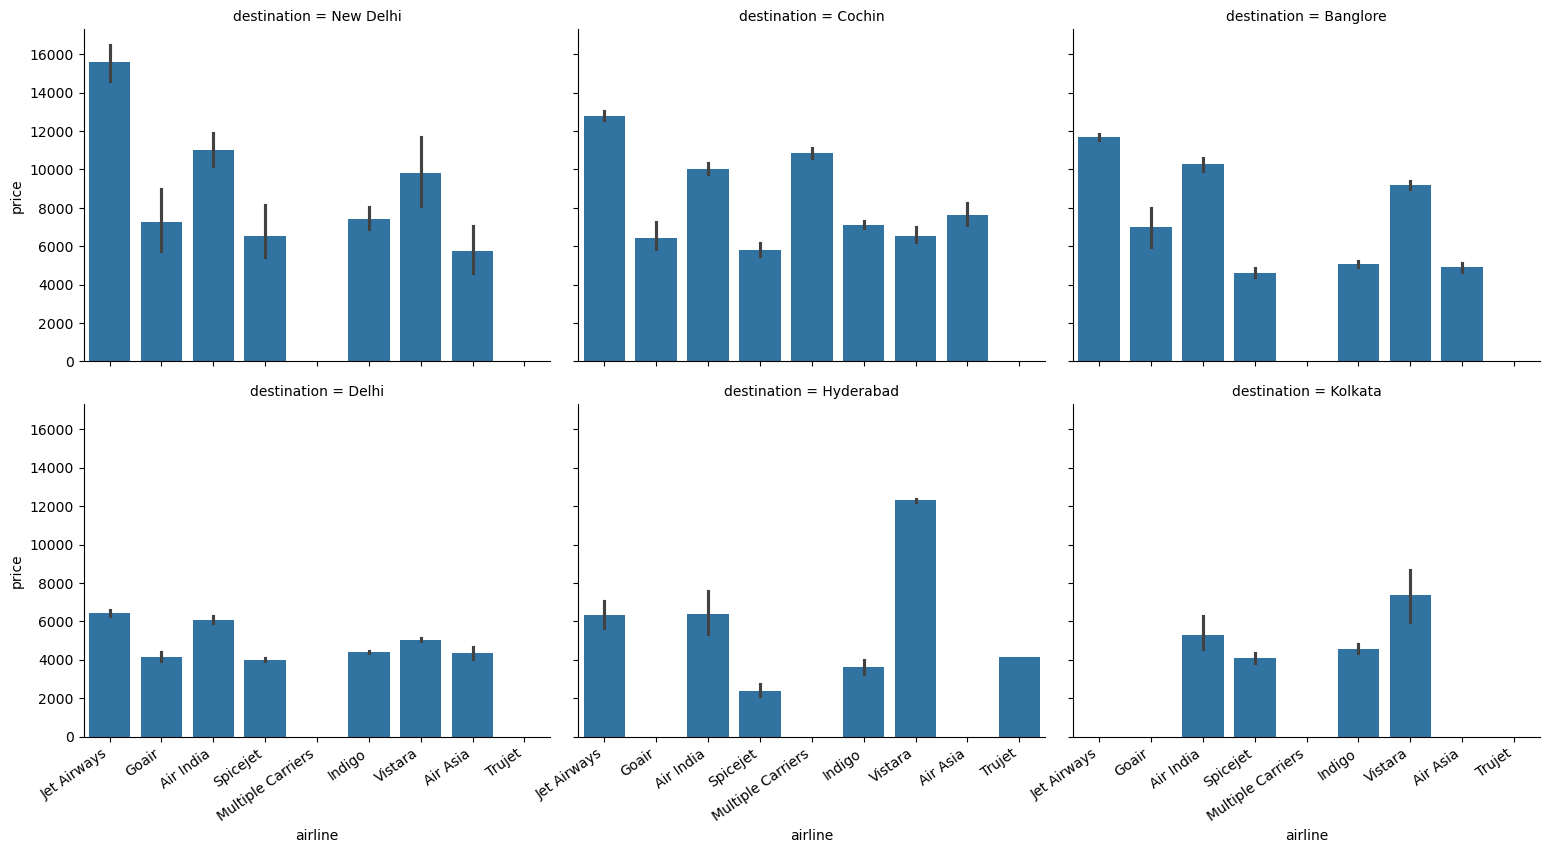

In [45]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.3,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [47]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

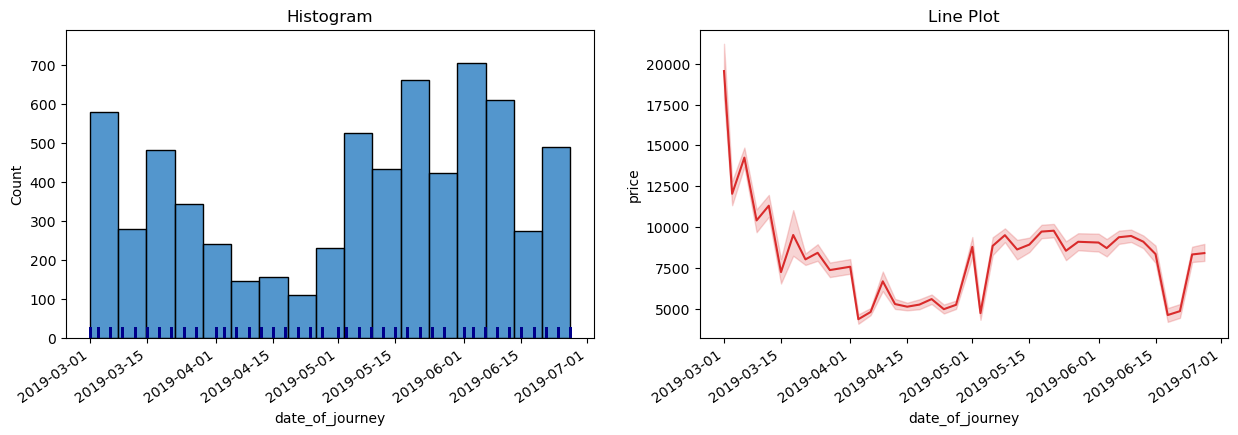

In [48]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

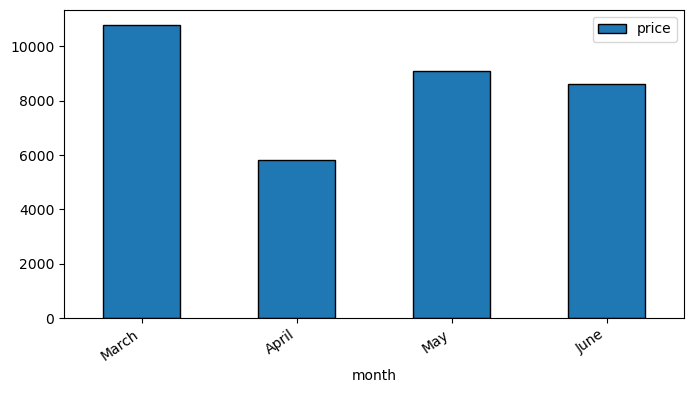

In [49]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

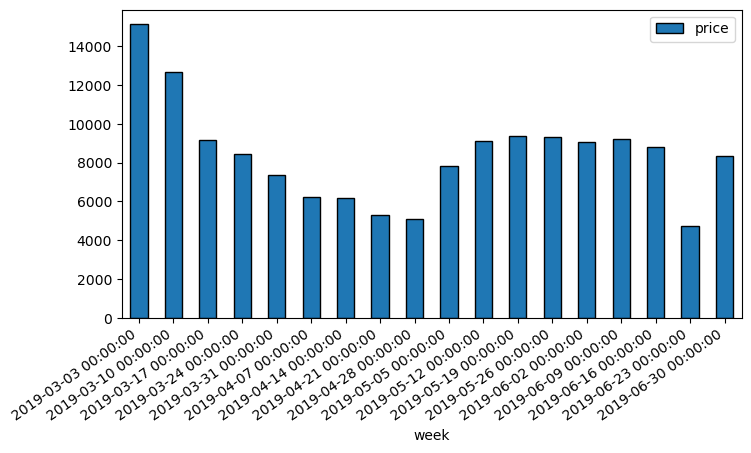

In [50]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

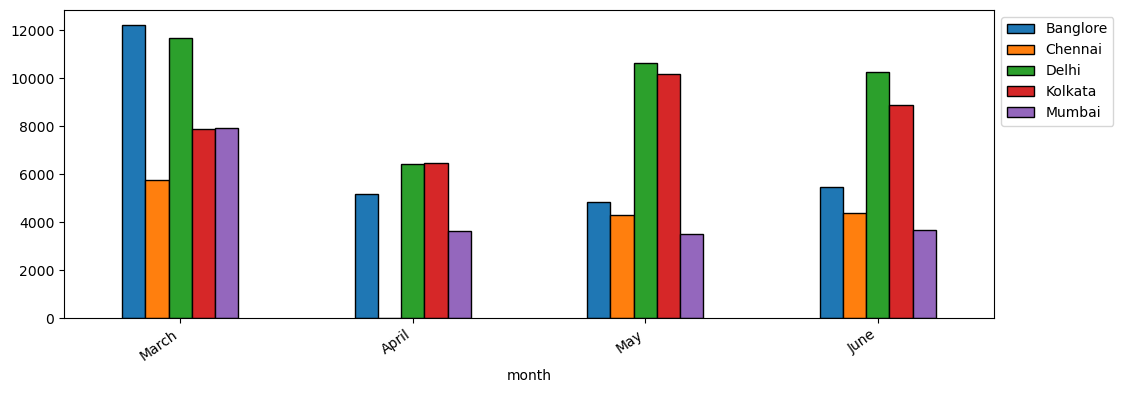

In [51]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [53]:
train.dep_time

0      2024-06-23 08:55:00
1      2024-06-23 17:30:00
2      2024-06-23 11:40:00
3      2024-06-23 09:25:00
4      2024-06-23 22:55:00
               ...        
6690   2024-06-23 10:45:00
6691   2024-06-23 09:25:00
6692   2024-06-23 14:00:00
6693   2024-06-23 07:55:00
6694   2024-06-23 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

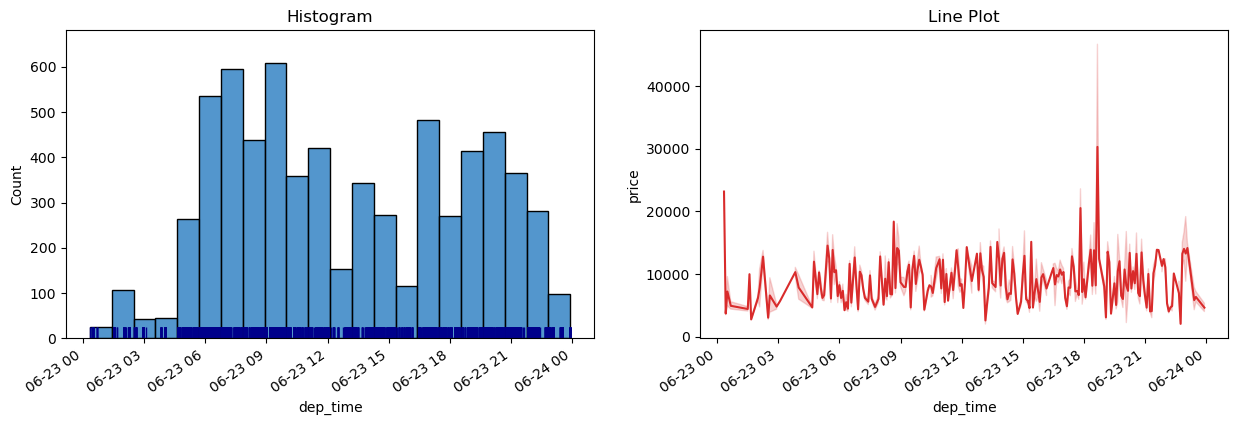

In [54]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

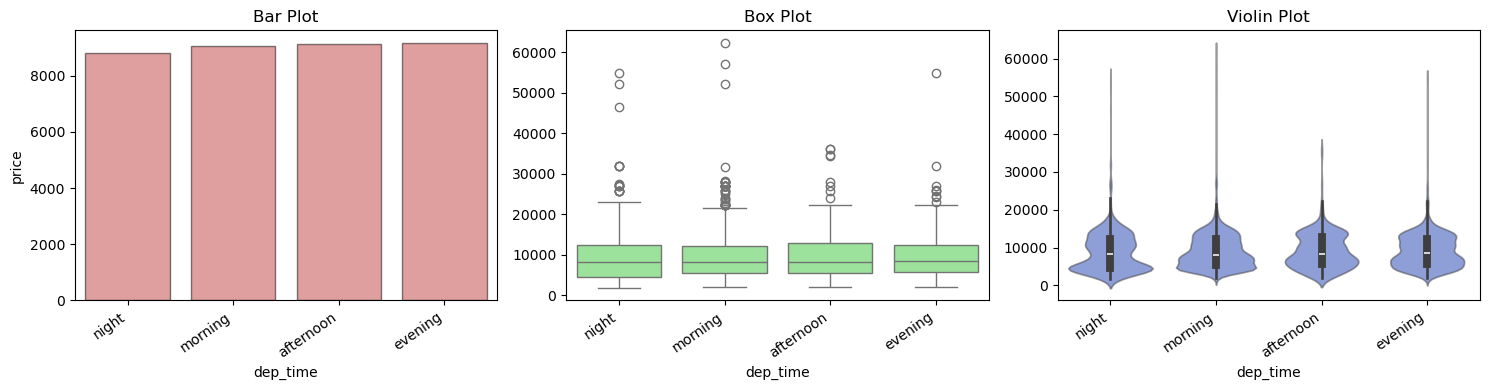

In [55]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [57]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [58]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.367044778597017e-57
Test Statistic       : 0.886539636636061
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [59]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    510.0
0.75    920.0
Name: duration, dtype: float64

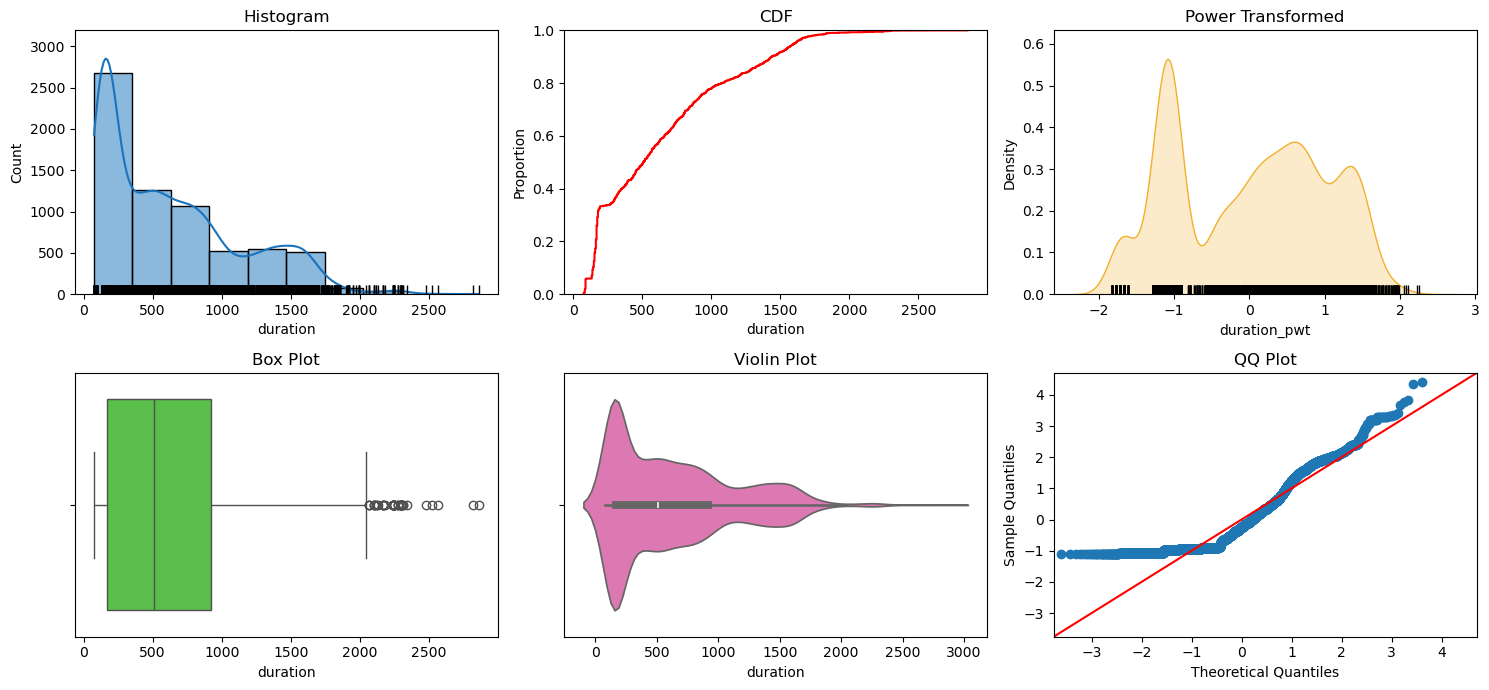

In [60]:
eda_helper_functions.num_univar_plots(train, "duration")

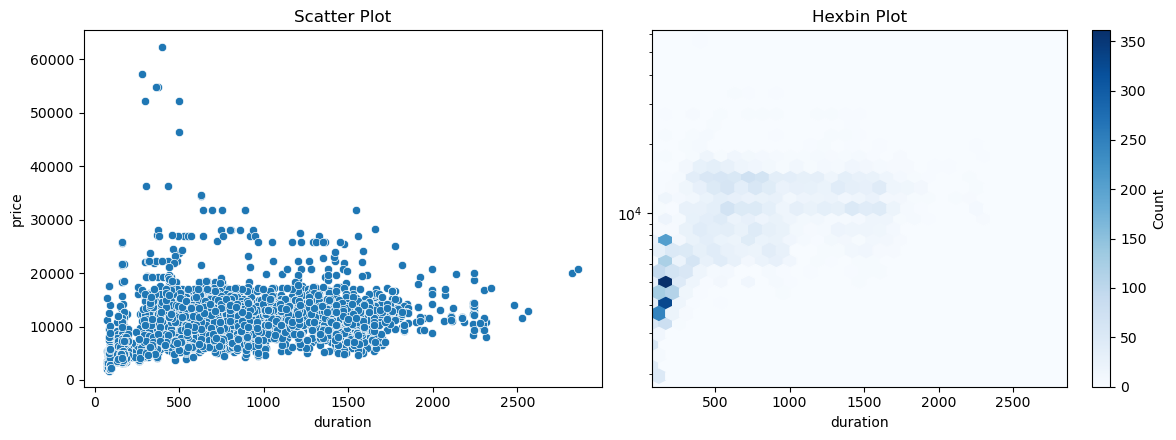

In [61]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    scatter_kwargs=dict(),  
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=30,
        cmap="Blues"
    )
)


In [62]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906561
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004595
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


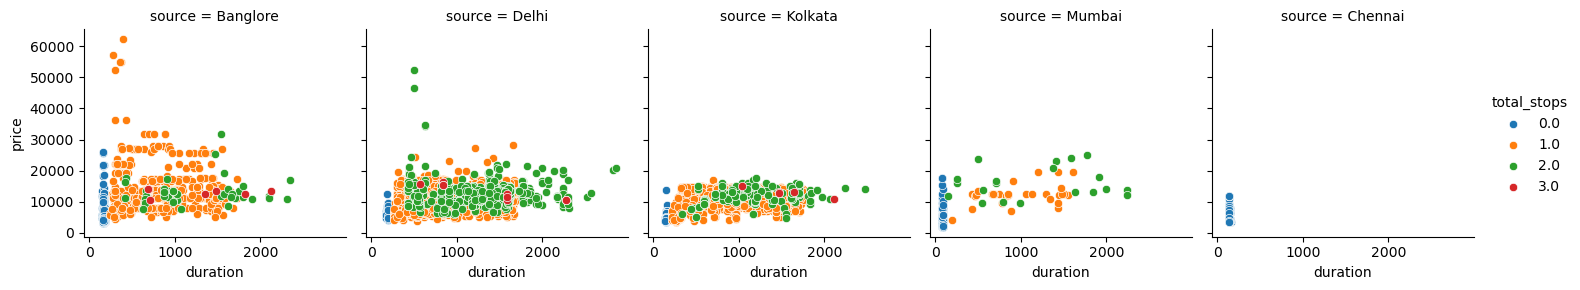

In [63]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

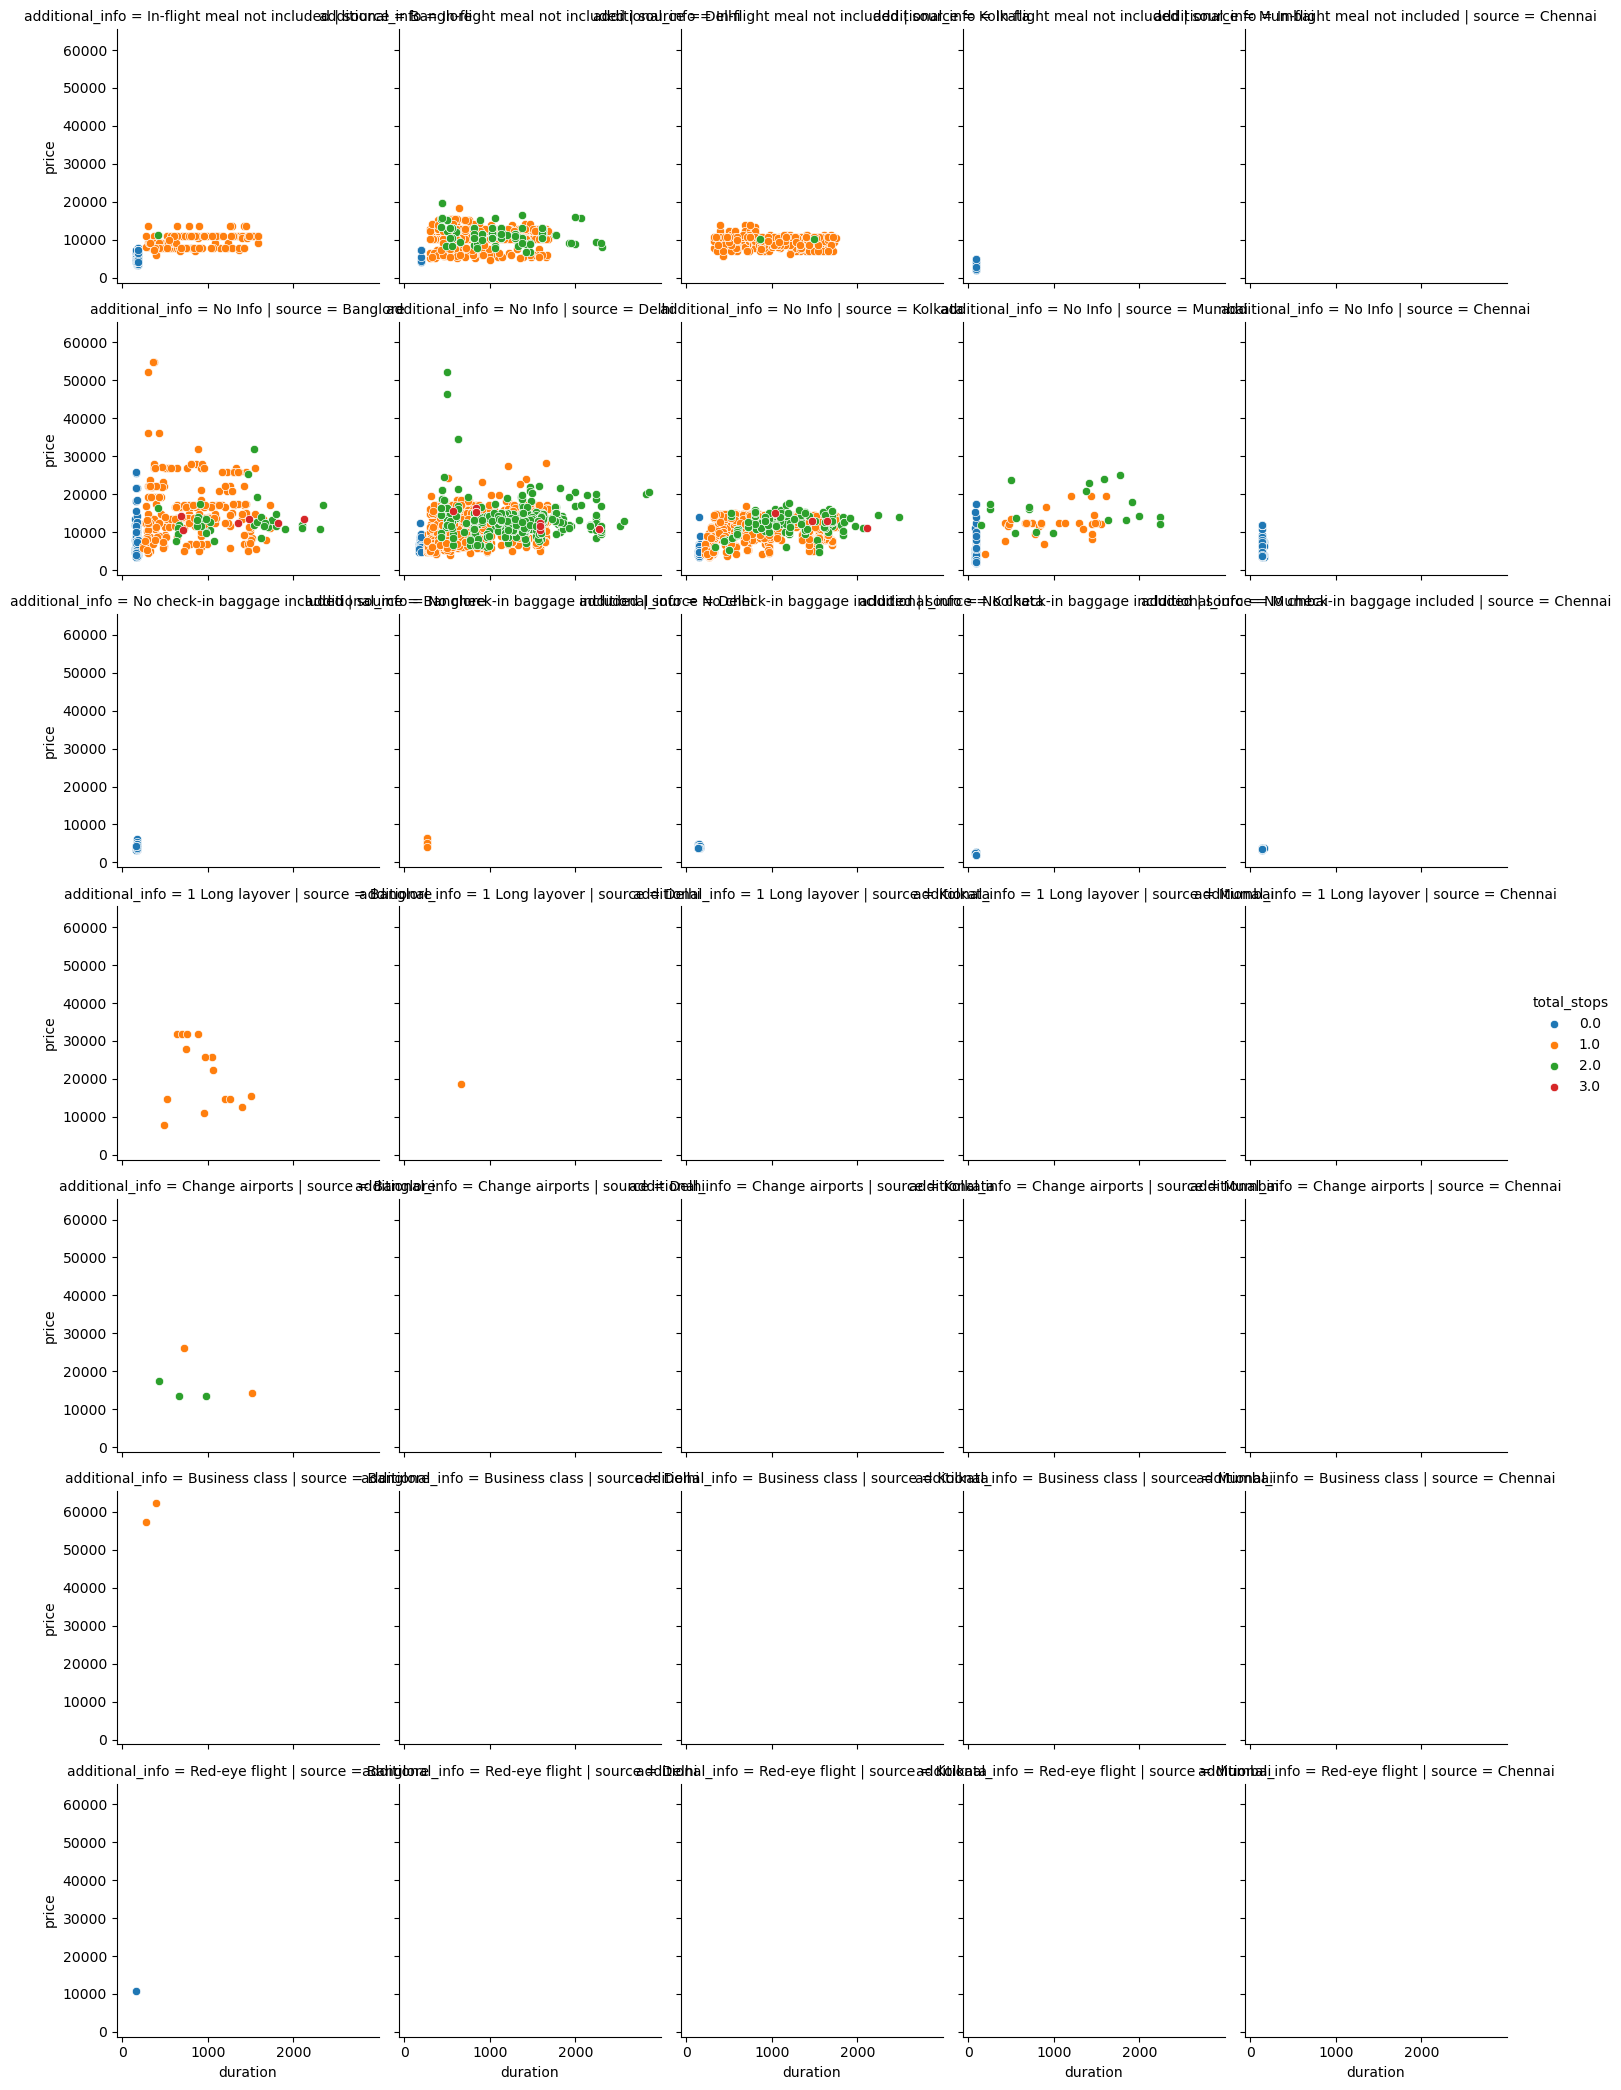

In [64]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [65]:
outlier2=eda_helper_functions.get_iqr_outliers(train, "duration")
outlier2.shape

Lower Limit : -955.0
Upper Limit : 2045.0


(49, 10)

In [66]:
import pandas as pd

def remove_iqr_outliers(data, column_name):
  """
  Removes outliers from a specific column in a pandas DataFrame using IQR.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.
      column_name (str): The name of the column to check for outliers.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed from the specified column.
  """

  # Check if data is empty
  if data.empty:
    print("data is empty. No outliers to remove.")
    return data

  # Calculate IQR
  q1 = data[column_name].quantile(0.25)
  q3 = data[column_name].quantile(0.75)
  iqr = q3 - q1

  # Define lower and upper bounds for outliers (1.5 times IQR)
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Filter out outliers
  filtered_data = data[data[column_name].between(lower_bound, upper_bound)]

  return filtered_data

# Read the data from train.csv
data = train.copy()

# Specify the column to check for outliers (replace 'your_column_name' with the actual column name)
column_to_check = "duration"

# Remove outliers and store the result
data_without_outliers = remove_iqr_outliers(data.copy(), column_to_check)

# You can now use data_without_outliers for further analysis

data_without_outliers
data_without_outliers.to_csv("data_without_outliers.csv", index=False) 

## Winsorization

Purpose: Mitigates the impact of outliers without removing them entirely.
## How it Works:
Replaces extreme values with less extreme values at specified percentiles.
Commonly uses the 5th and 95th percentiles, but thresholds are adjustable.
## Benefits:
Preserves information contained in outliers.
Reduces the influence of outliers on statistical analyses and models.
Improves robustness of models, especially when outliers are not errors.
## When to Use:
Moderate outliers exist.
Skewed data distributions.
Models sensitive to outliers.
## Methods:
scipy.stats.mstats.winsorize: Simple and direct.
feature_engine.outliers.Winsorizer: Integrates well with ML pipelines, offers flexibility.
pandas: Manual control using quantiles and clip.

In [68]:
from feature_engine.outliers import Winsorizer

# Create the Winsorizer object (default limits are 5th and 95th percentiles)
winsorizer = Winsorizer(capping_method='quantiles', tail='both', fold=0.05)
# Fit and transform the data
train['duration'] = winsorizer.fit_transform(train[['duration']])
train.to_csv("train.csv", index=False) 

### 8.5 additional_info

In [70]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,7
top,No Info
freq,5248


,count,percentage
category,,
No Info,5248,0.783986
In-flight meal not included,1215,0.181506
No check-in baggage included,207,0.030923
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


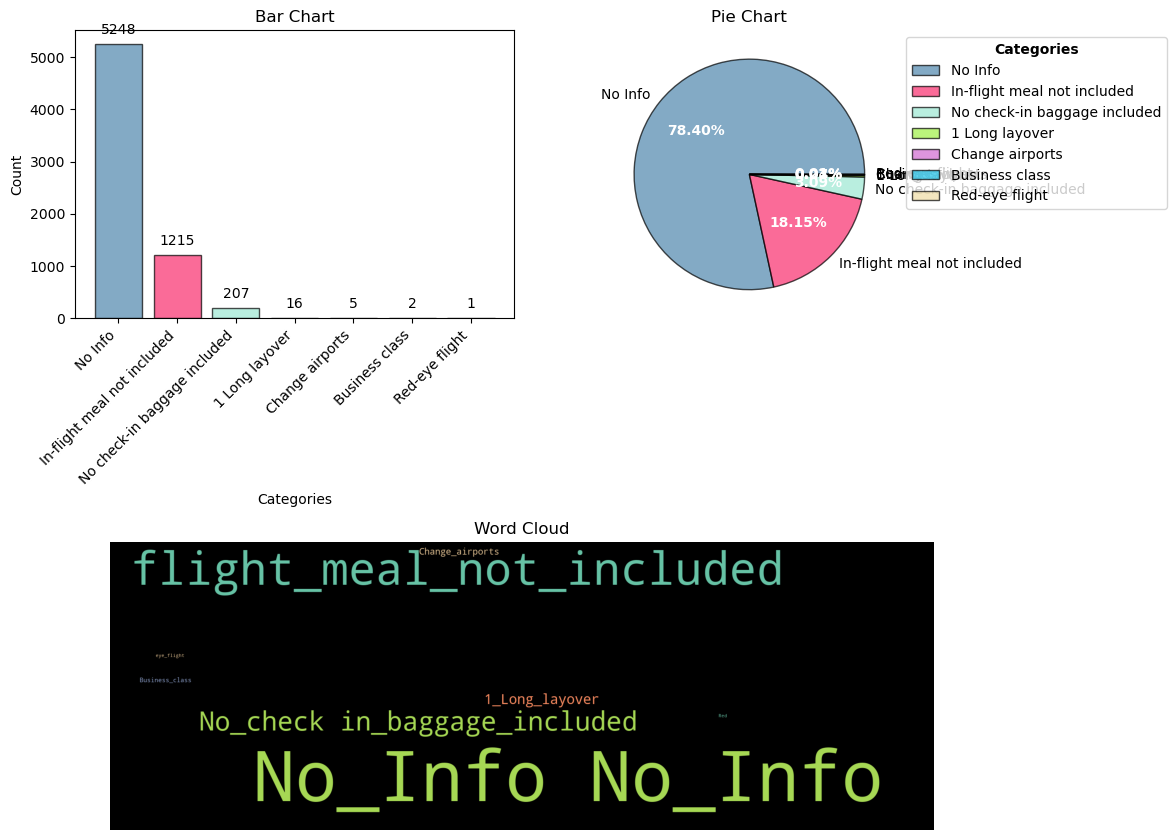

In [71]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

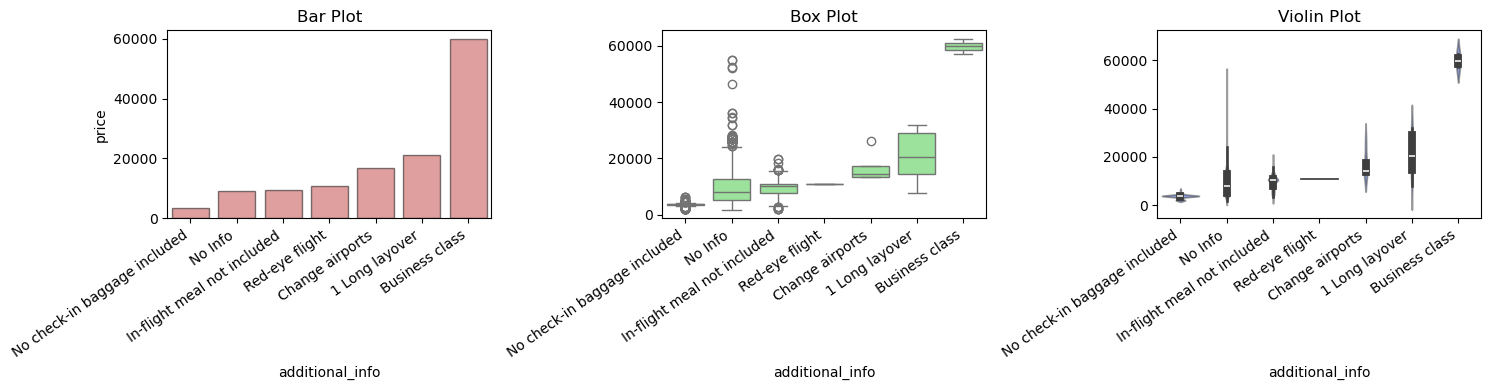

In [72]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

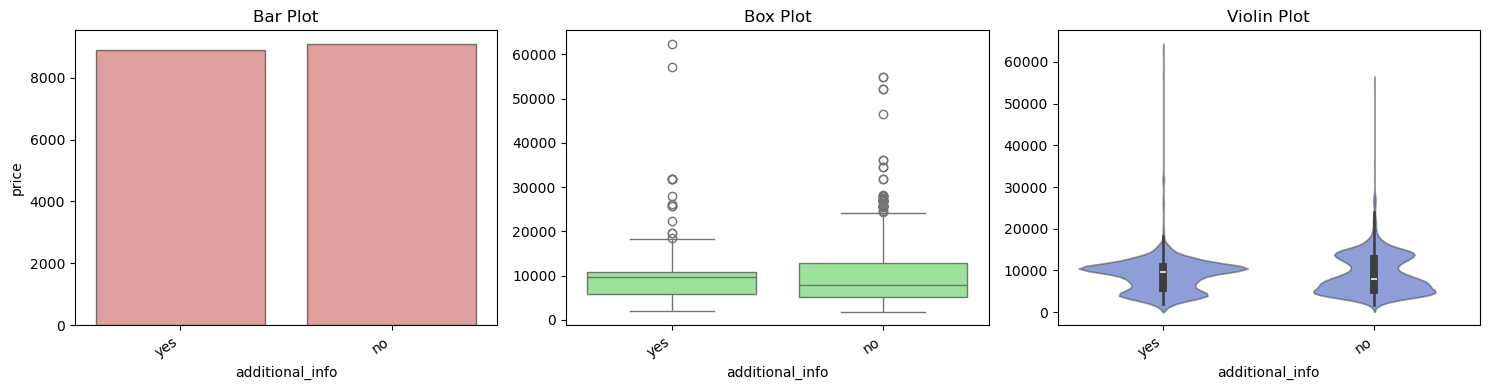

In [73]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [76]:
!pip install --user ydata_profiling

In [77]:
!pip show ydata_profiling

Name: ydata-profiling
Version: 4.8.3
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: C:\Users\vedan\AppData\Roaming\Python\Python311\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [78]:
from ydata_profiling import ProfileReport

In [79]:
report = ProfileReport(train)

In [140]:
report.to_file(output_file="output1.html")